# 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data preparation

In [2]:
df = pd.read_csv('Hitters.csv')

In [3]:
df.dropna(inplace = True)
df.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis=1, inplace = True)

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [5]:
y = df.Salary
X = df.drop('Salary', axis=1)

## Lasso

In [6]:
from sklearn import linear_model

In [7]:
alphas = 10**np.linspace(8,-2,100)*0.5

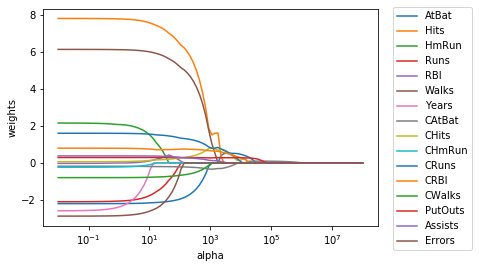

In [8]:
lasso_clf = linear_model.Lasso(max_iter = 10000)
coefs = []
for i in alphas:
    lasso_clf.set_params(alpha = i)
    lasso_clf.fit(X,y)
    coefs.append(lasso_clf.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(X.columns, bbox_to_anchor=(1.03, 1.03))
plt.show()

## LassoCV

In [9]:
lasso_cv = linear_model.LassoCV(cv=10, random_state=42, max_iter = 10000).fit(X, y)

In [10]:
for i,j in zip(X.columns, lasso_cv.coef_):
    print(i, ':', round(j, 3))

AtBat : -0.0
Hits : 1.496
HmRun : 0.0
Runs : 0.0
RBI : 0.0
Walks : 1.14
Years : -0.0
CAtBat : -0.337
CHits : 0.823
CHmRun : 0.0
CRuns : 0.799
CRBI : 0.655
CWalks : -0.033
PutOuts : 0.276
Assists : 0.132
Errors : -0.0


In [11]:
print('There are 9 parameters left, after cross validation, and the optimal regulation penalty is', round(lasso_cv.alpha_, 3))

There are 9 parameters left, after cross validation, and the optimal regulation penalty is 540.656


## Ridge

In [12]:
alphas = 10**np.linspace(9,-2,100)*0.5

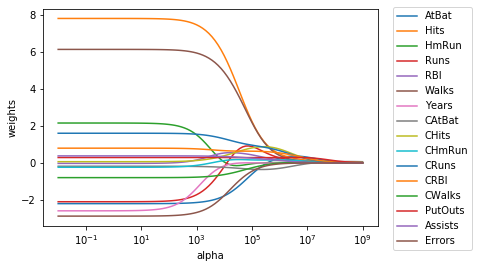

In [13]:
ridge_clf = linear_model.Ridge()
coefs = []
for i in alphas:
    ridge_clf.set_params(alpha = i)
    ridge_clf.fit(X,y)
    coefs.append(ridge_clf.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(X.columns, bbox_to_anchor=(1.03, 1.03))
plt.show()

## RidgeCV

In [14]:
ridge_cv = linear_model.RidgeCV(alphas = alphas, cv=10).fit(X, y)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
print('The optimal regulation penalty is', round(ridge_cv.alpha_, 3))

The optimal regulation penalty is 1077217.345


# 2.

Bias-variance tradeoff generally means when a model gives small bias, it also gives huge variance, and vice versa. Complicated models can fit data very well and generate low bias, but at the same time, they also bring high variance, because they are too sensitive to each data point, in order to fit data well. In application, we want to find a sweet point to balance bias and variance, where the model does not give much bias, but also not too much variance. In Question 1, according to Lasso cross validation, only 9 variables are kept. In this way, the model can reduce some variance, since it becomes less complicated, but potentially bring more bias.